### Convolutional Neural Network - Augmented and Pretrained

Some research teams have trained convolutional neural networks on much larger datasets. We have seen during the lecture that the networks can model conceptual patterns as they go through the layers. This was identified by Le Cun in his first experiments (http://yann.lecun.com/exdb/lenet/). In this last part, you will train classifiers on top of a pretrained convolutional base.
1. Build a network that consists of the Inception V3 convolutional base and two dense layers. As in Chollet, Listing 5.17, you will program an  function.

    `extract_features()`

2. Train your network and report the training and validation losses and accuracies.
3. Apply your network to the test set and report the accuracy as well as the confusion matrix you obtained.
4. Modify your program to include an image transformer. Train a new model.
5. Apply your network to the test set and report the accuracy as well as the confusion matrix you obtained.

#### Scale Images

In [3]:
from keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

TRAIN_DIR = 'flowers_split/train'
VAL_DIR = 'flowers_split/validation'
TEST_DIR = 'flowers_split/test'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory( 
    VAL_DIR,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory( 
    TEST_DIR,
    target_size=(150, 150),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical')



Using TensorFlow backend.


Found 2654 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
for data_batch, labels_batch in validation_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 5)


#### Build Model

In [7]:
from keras import models
from keras import layers
from keras import optimizers
"""
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=3* 3 * 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
"""

model = models.Sequential() 
model.add(conv_base)
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(5, activation='softmax'))

"""
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
#model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(5, activation='softmax'))
"""
model.summary()
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights)) 


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1285      
Total params: 26,522,917
Trainable params: 26,488,485
Non-trainable params: 34,432
_________________________________________________________________
This is the number of trainable weights before freezing the conv base: 192
This is the number of trainable weights after freezing the conv base: 4


#### Compile

In [8]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Fit the model

In [9]:
history = model.fit_generator( train_generator,
      steps_per_epoch=2654//batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=865//batch_size)

Epoch 1/50
132/132 [==============================] - 72s 549ms/step - loss: 1.3335 - acc: 0.5133 - val_loss: 1.7785 - val_acc: 0.5535
Epoch 2/50
132/132 [==============================] - 71s 538ms/step - loss: 0.9949 - acc: 0.6295 - val_loss: 6.4900 - val_acc: 0.4923
Epoch 3/50
132/132 [==============================] - 71s 539ms/step - loss: 0.9000 - acc: 0.6769 - val_loss: 1.6275 - val_acc: 0.5645
Epoch 4/50
132/132 [==============================] - 71s 535ms/step - loss: 0.8902 - acc: 0.6796 - val_loss: 4.8005 - val_acc: 0.6012
Epoch 5/50
132/132 [==============================] - 71s 539ms/step - loss: 0.8427 - acc: 0.6932 - val_loss: 2.2739 - val_acc: 0.5456
Epoch 6/50
132/132 [==============================] - 71s 537ms/step - loss: 0.7754 - acc: 0.7232 - val_loss: 4.4124 - val_acc: 0.5207
Epoch 7/50
132/132 [==============================] - 73s 556ms/step - loss: 0.7763 - acc: 0.7289 - val_loss: 3.2753 - val_acc: 0.5266
Epoch 8/50
132/132 [==============================] - 7

#### Save the model

In [10]:
model.save('flower_picker_x3000_50.h5')

#### Load the model

In [2]:
from keras.models import load_model
model = load_model('flower_picker_x3000_50.h5')

/Users/ludde/opt/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


#### Display Loss and Acc

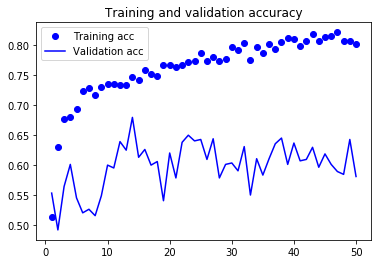

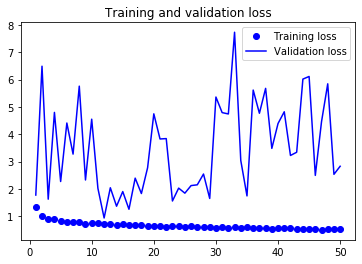

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)
print('test loss:', test_loss)

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

test acc: 0.6527918577194214
test loss: 0.2189677655696869
Confusion Matrix
[[167   0   1   1   6]
 [101  72   0  22   8]
 [ 28   1  68   6  55]
 [ 54   1   2  74   9]
 [ 28   5   5   5 146]]
Classification Report
              precision    recall  f1-score   support

       Daisy       0.44      0.95      0.60       175
   Dandelion       0.91      0.35      0.51       203
        Rose       0.89      0.43      0.58       158
   Sunflower       0.69      0.53      0.60       140
       Tulip       0.65      0.77      0.71       189

    accuracy                           0.61       865
   macro avg       0.72      0.61      0.60       865
weighted avg       0.72      0.61      0.60       865

